In [1]:
!pip install scanpy==1.10.2 anndata==0.10.8 umap-learn==0.5.6 numpy==1.26.4 scipy==1.13.1 pandas==2.1.4 scikit-learn==1.3.2 statsmodels==0.14.2 pynndescent==0.5.13 h5py==3.9.0


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.4/124.4 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 97.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 7.3 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=1dd23f7834be4f51283d7fbac174e2c4dbe726bc798386da2809acf2aebb375a
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info
  Attempting uninstall: h5py
    Found existing installation: h5py 3.11.0
    Uninstalling h5py-3.11.0:
      Successfully uninstalled h5py-3.11.0
ERROR: pip's dependency resolver does not c

In [2]:
!pip install igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 45.2 MB/s eta 0:00:00


In [3]:
!pip install leidenalg


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.1 MB/s eta 0:00:00


In [4]:
!pip install python-louvain


In [5]:
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pooch

In [6]:
!pip install scvi-tools


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 387.7/387.7 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.1/348.1 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.2/866.2 kB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 49.7 MB/s eta 0:00:00
  Created wheel for docrep: filename=docrep-0.3.2-py3-none-any.whl size=19876 sha256=db441f8015f83246f6903d336d911ac5e05cbb7c58212631b079f8773c04fb98
  Stored in directory: /root/.cache/pip/wheels/c

In [7]:
!pip install --quiet scvi-colab
from scvi_colab import install

install()

INFO     scvi-colab: Installing scvi-tools.                                                                        
INFO     scvi-colab: Install successful. Testing import.                                                           


In [8]:
import torch
import scvi
import seaborn as sns


In [9]:
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor="white")

scanpy==1.10.2 anndata==0.10.8 umap==0.5.6 numpy==1.26.4 scipy==1.13.1 pandas==2.1.4 scikit-learn==1.3.2 statsmodels==0.14.2 igraph==0.11.6 pynndescent==0.5.13


In [18]:
adata = sc.read_h5ad("/dataset.h5ad")


In [17]:
gene_names = pd.read_csv('/gene_names.csv', header=None)

In [19]:
if len(gene_names) == adata.shape[1] + 1:
    gene_names = gene_names.iloc[1:]
adata.var_names = gene_names[0].values

# Quality Control(QC)

In [20]:
adata.obs['n_counts'] = adata.X.sum(axis=1)
adata.obs['log_counts'] = np.log(adata.obs['n_counts'])
adata.obs['n_genes'] = (adata.X > 0).sum(axis=1)

In [21]:
mt_gene_mask = [gene.startswith('MT-') for gene in adata.var_names]
adata.obs['mt_frac'] = adata.X[:, mt_gene_mask].sum(axis=1) / adata.obs['n_counts']

In [22]:
adata.var["mt"] = adata.var_names.str.startswith("MT-")
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")

In [23]:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)

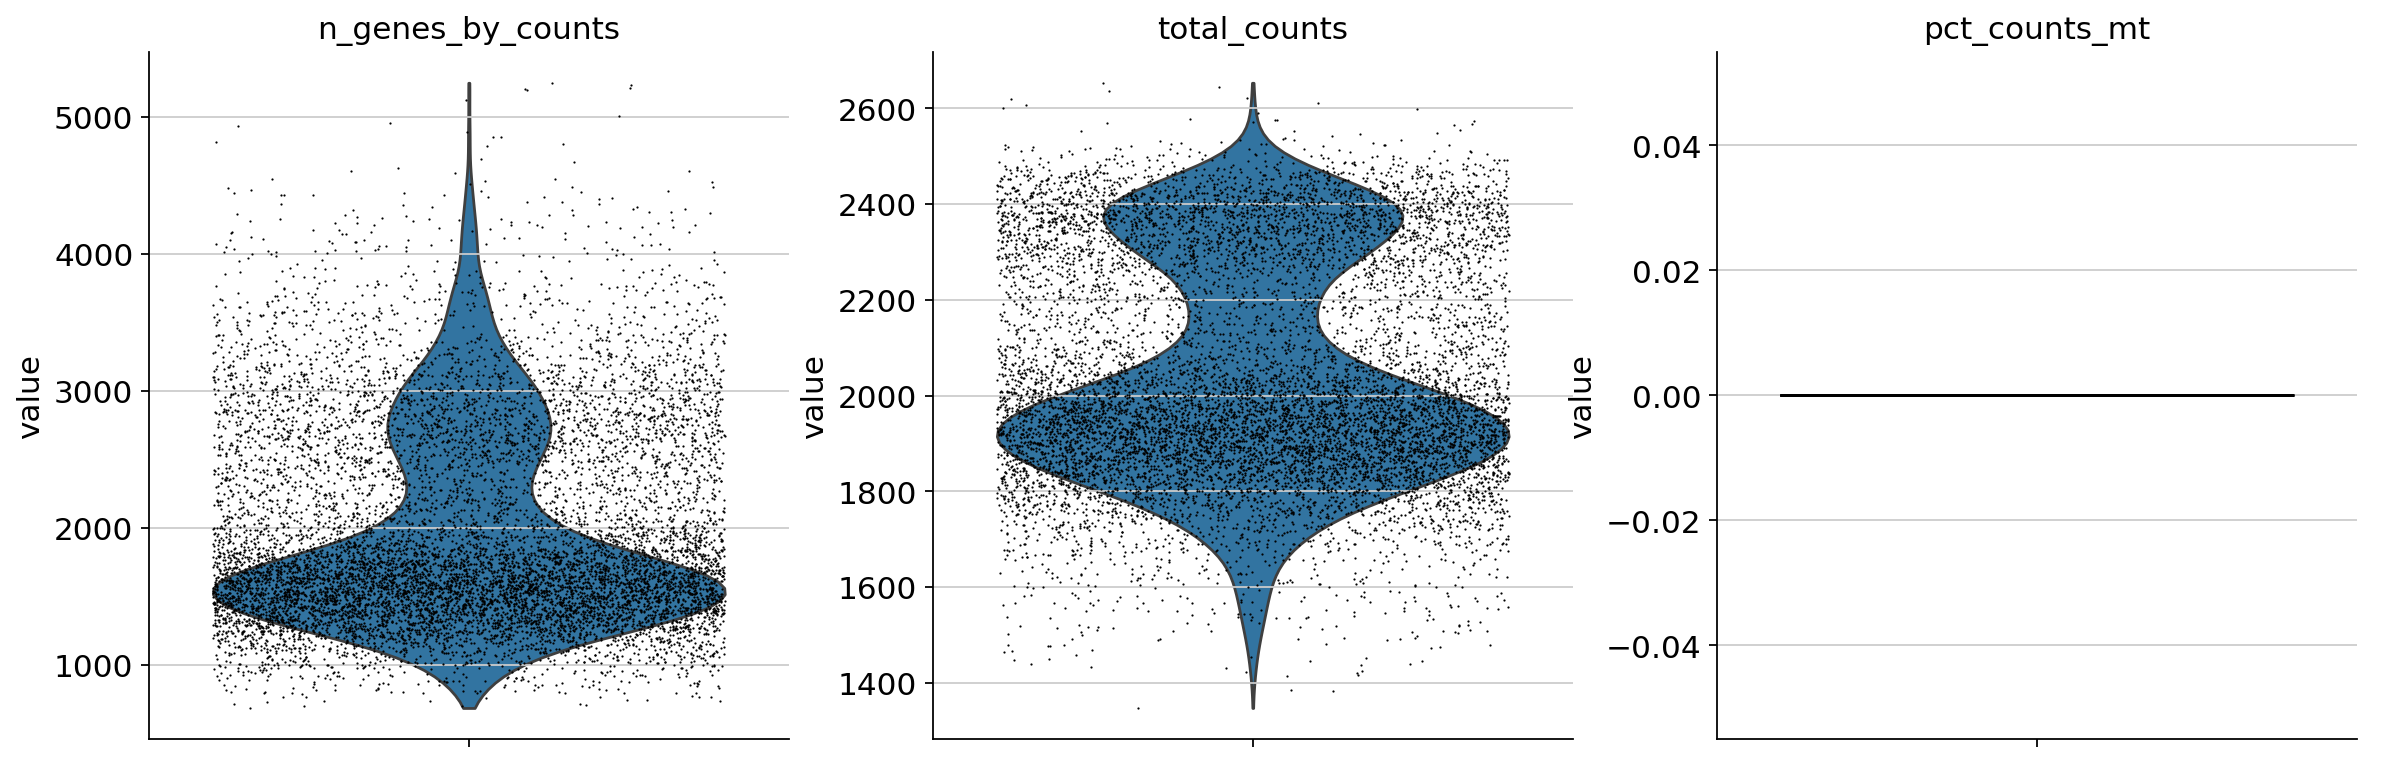

In [24]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

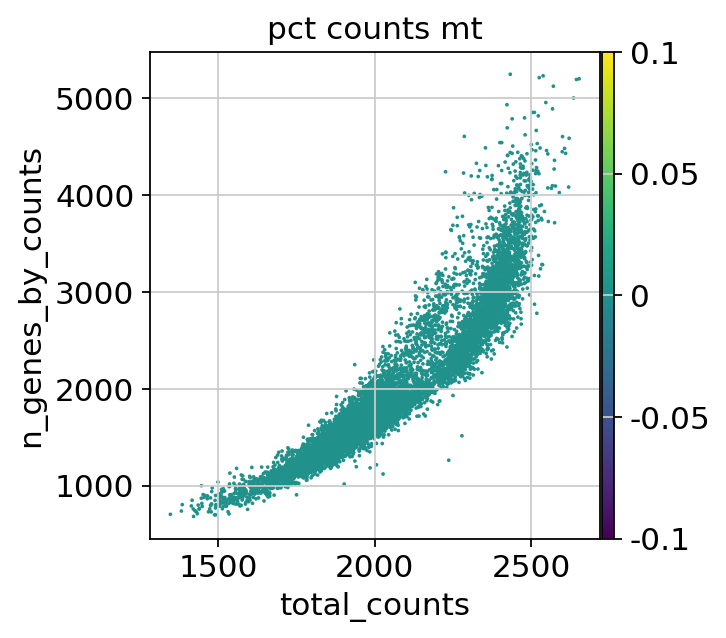

In [25]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [26]:
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 74 genes that are detected in less than 3 cells


In [27]:
sc.pp.scrublet(adata)

Running Scrublet
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
    using data matrix X directly
Automatically set threshold at doublet score = 0.24
Detected doublet rate = 1.5%
Estimated detectable doublet fraction = 69.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.2%
    Scrublet finished (0:02:01)


In [28]:
adata.layers["counts"] = adata.X.copy()

# Normalize and Log Transform

In [29]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


# Feature Selection and PCA

In [30]:
sc.pp.highly_variable_genes(adata, n_top_genes=1000)

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


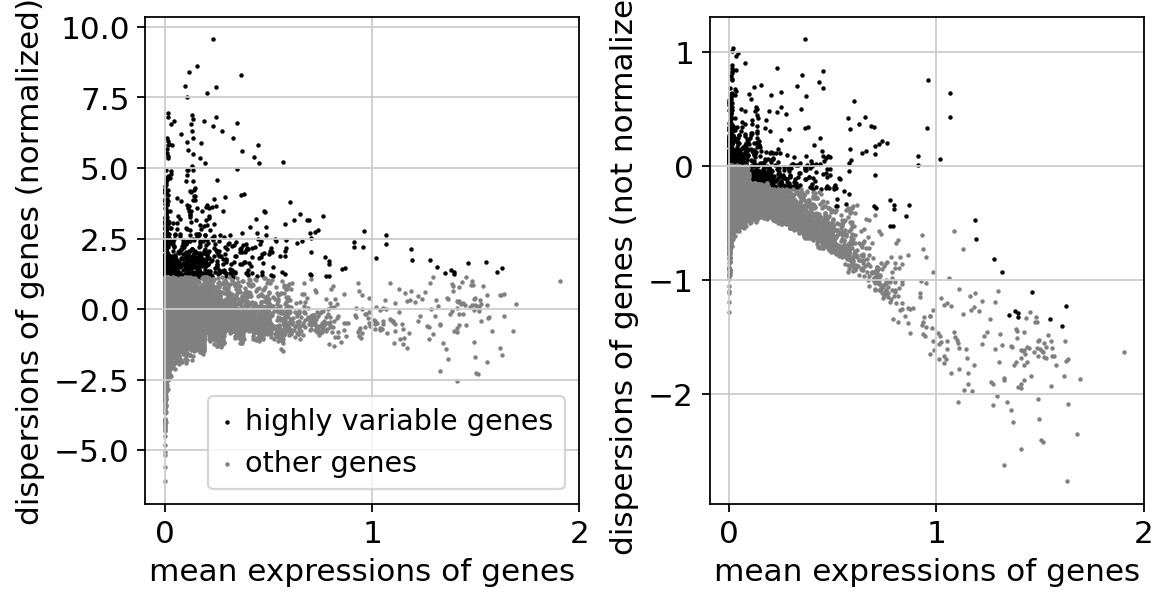

In [31]:
sc.pl.highly_variable_genes(adata)

In [32]:
scvi.model.LinearSCVI.setup_anndata(adata, layer="counts")
model = scvi.model.LinearSCVI(adata, n_latent=10)

/usr/local/lib/python3.10/dist-packages/scvi/data/fields/_base_field.py:64: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


In [33]:
model.train(max_epochs=250, plan_kwargs={"lr": 5e-3}, check_val_every_n_epoch=10)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 250/250: 100%|██████████| 250/250 [04:02<00:00,  1.03it/s, v_num=1, train_loss_step=3.76e+3, train_loss_epoch=3.74e+3]

INFO: `Trainer.fit` stopped: `max_epochs=250` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=250` reached.


Epoch 250/250: 100%|██████████| 250/250 [04:02<00:00,  1.03it/s, v_num=1, train_loss_step=3.76e+3, train_loss_epoch=3.74e+3]


<Axes: xlabel='epoch'>

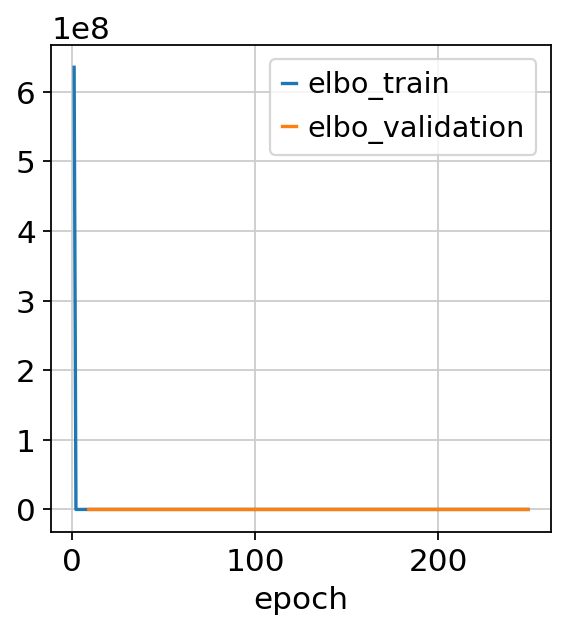

In [34]:
train_elbo = model.history["elbo_train"][1:]
test_elbo = model.history["elbo_validation"]

ax = train_elbo.plot()
test_elbo.plot(ax=ax)

In [35]:
Z_hat = model.get_latent_representation()
for i, z in enumerate(Z_hat.T):
    adata.obs[f"Z_{i}"] = z

<ipython-input-36-377e21615e94>:18: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in lgd.legendHandles:


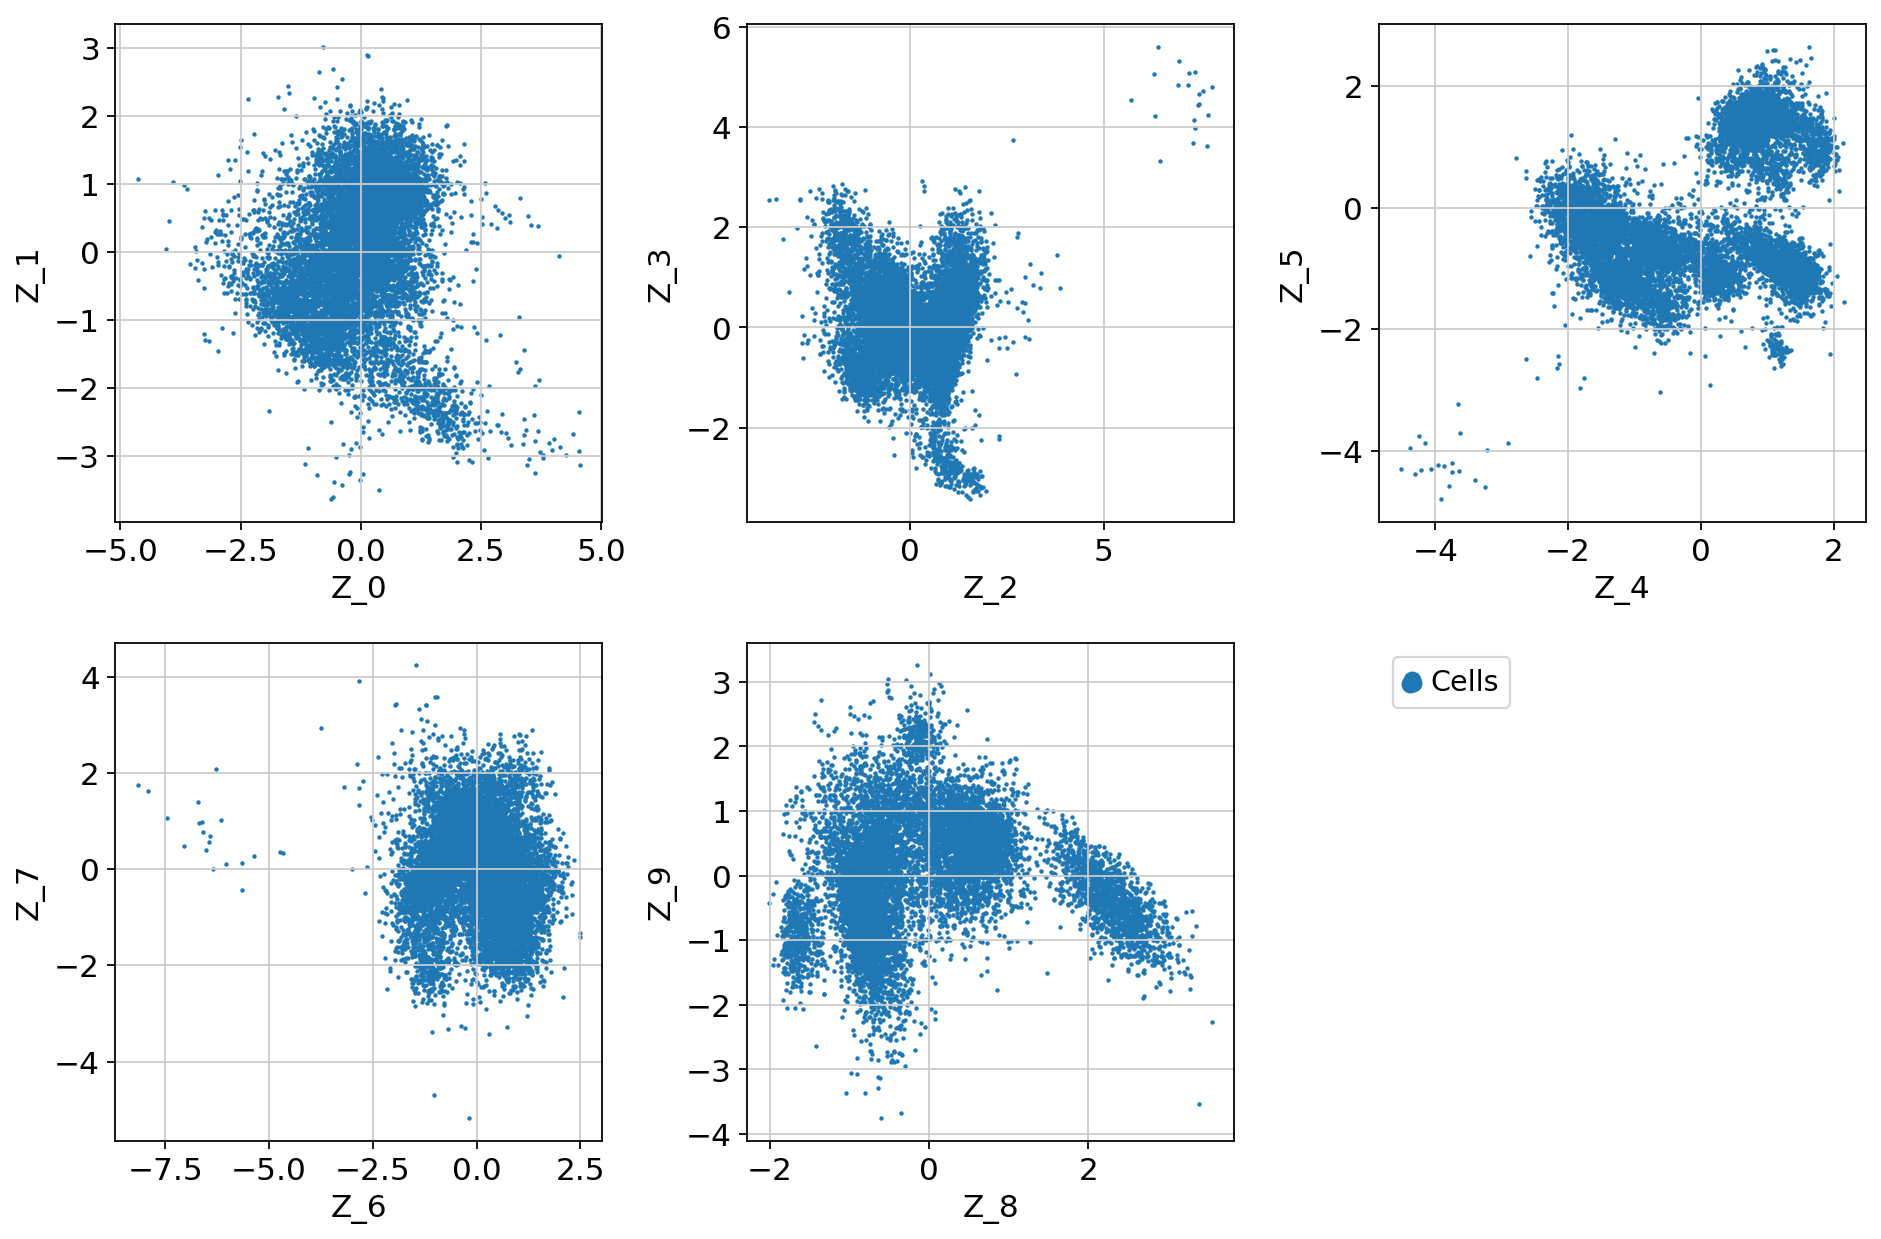

In [36]:
fig = plt.figure(figsize=(12, 8))

for f in range(0, 9, 2):
    plt.subplot(2, 3, int(f / 2) + 1)

    plt.scatter(adata.obs[f"Z_{f}"], adata.obs[f"Z_{f + 1}"], marker=".", s=4, label="Cells")

    plt.xlabel(f"Z_{f}")
    plt.ylabel(f"Z_{f + 1}")

plt.subplot(2, 3, 6)
plt.scatter(adata.obs[f"Z_{f}"], adata.obs[f"Z_{f + 1}"], marker=".", label="Cells", s=4)
plt.scatter(adata.obs[f"Z_{f}"], adata.obs[f"Z_{f + 1}"], c="w", label=None)
plt.gca().set_frame_on(False)
plt.gca().axis("off")

lgd = plt.legend(scatterpoints=3, loc="upper left")
for handle in lgd.legendHandles:
    handle.set_sizes([200])


plt.tight_layout()

In [37]:
loadings = model.get_loadings()
loadings.head()

,Z_0,Z_1,Z_2,Z_3,Z_4,Z_5,Z_6,Z_7,Z_8,Z_9
LINC00115,-0.139543,0.039248,-0.262242,0.016193,0.020852,0.008230,-0.055597,-0.083239,0.013363,0.077968
FAM41C,0.085202,-0.063485,-0.004111,0.027013,0.033590,-0.056891,-0.016305,-0.005052,0.170929,-0.202825
SAMD11,0.232265,-0.342606,-0.043355,0.116664,-0.205714,-0.063048,-0.024963,0.278826,0.301390,0.302897
NOC2L,-0.014696,-0.032807,-0.215532,-0.035494,-0.001113,-0.093903,0.025916,-0.161722,0.119838,0.097887
KLHL17,-0.034448,-0.145406,0.097178,0.041750,-0.028479,-0.033374,0.219849,-0.215549,-0.003561,-0.005357


In [38]:
SCVI_LATENT_KEY = "X_scVI"
SCVI_CLUSTERS_KEY = "leiden_scVI"

adata.obsm[SCVI_LATENT_KEY] = Z_hat
sc.pp.neighbors(adata, use_rep=SCVI_LATENT_KEY, n_neighbors=20)
sc.tl.umap(adata, min_dist=0.3)
sc.tl.leiden(adata, key_added=SCVI_CLUSTERS_KEY, resolution=0.8)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:05)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)
running Leiden clustering


<ipython-input-38-733c12471ab0>:7: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, key_added=SCVI_CLUSTERS_KEY, resolution=0.8)


    finished: found 17 clusters and added
    'leiden_scVI', the cluster labels (adata.obs, categorical) (0:00:03)


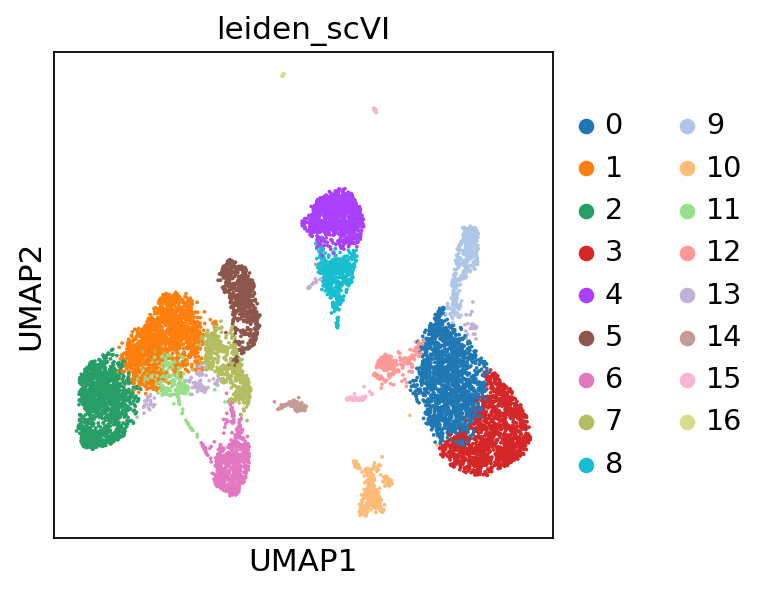

In [39]:
sc.pl.umap(adata, color=[SCVI_CLUSTERS_KEY])

In [41]:
sc.tl.rank_genes_groups(
    adata, groupby="leiden_scVI", method="wilcoxon", n_genes=5, key_added="dea_leiden_scVI"
)

ranking genes
    finished: added to `.uns['dea_leiden_scVI']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:28)


Storing dendrogram info using `.uns['dendrogram_leiden_scVI']`


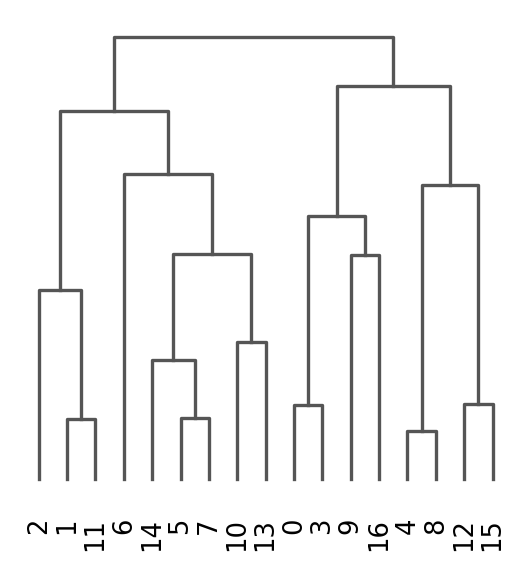

<Axes: >

In [45]:
# Assuming you want to use the latent space from scVI for the dendrogram
sc.tl.dendrogram(adata, groupby="leiden_scVI", use_rep=SCVI_LATENT_KEY)

# Now, plot the dendrogram or other relevant visualizations
sc.pl.dendrogram(adata, groupby="leiden_scVI")


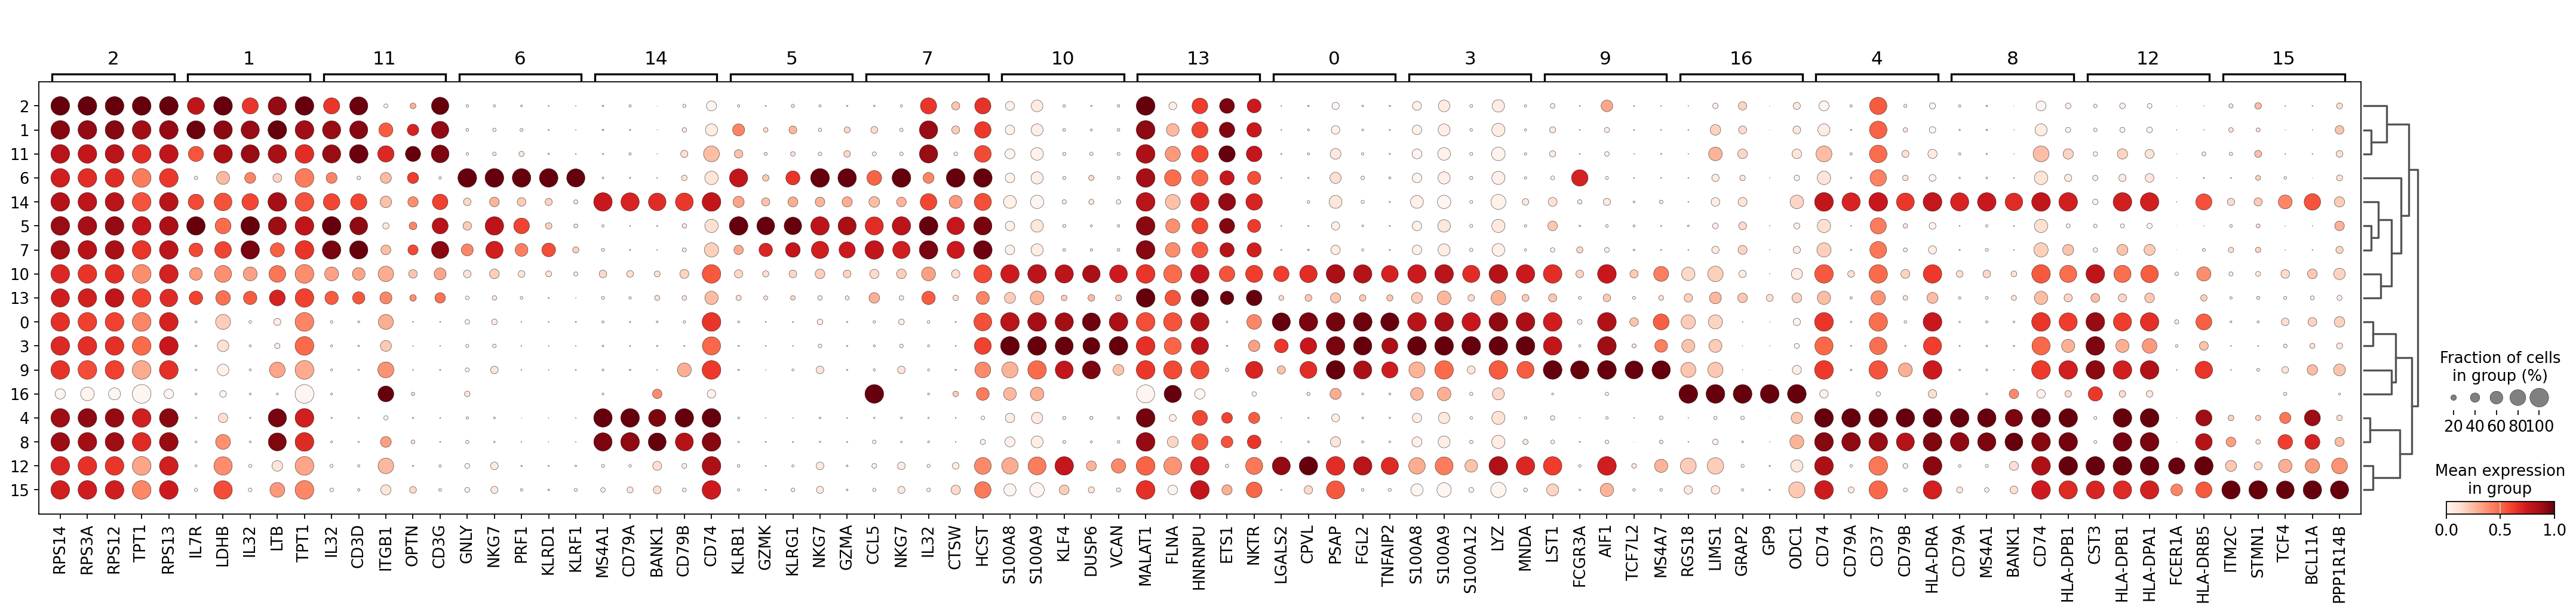

In [59]:
sc.pl.rank_genes_groups_dotplot(
    adata, groupby="leiden_scVI", standard_scale="var", n_genes=5, key="dea_leiden_scVI"
)

# Annotation

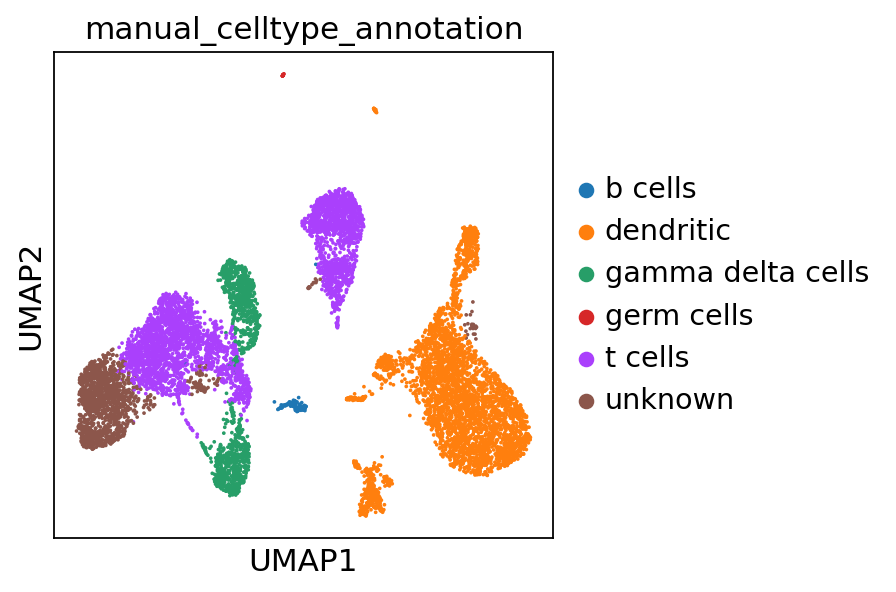

In [64]:
cl_annotations = {
    '0': "dendritic", '1': "t cells", '2': "unknown",  '3': "dendritic", '4': "t cells",
    '5': "gamma delta cells", '6': "gamma delta cells", '7': "t cells", '8': "t cells", '9': "dendritic",
    '10': "dendritic", '11': "t cells", '12': "dendritic",'13': "unknown",'14': "b cells",'15': "dendritic",'16': "germ cells"
}


adata.obs["manual_celltype_annotation"] = adata.obs['leiden_scVI'].map(cl_annotations)


adata.obs["manual_celltype_annotation"] = adata.obs["manual_celltype_annotation"].fillna("unknown")


sc.pl.umap(
    adata,
    color=["manual_celltype_annotation"],
)

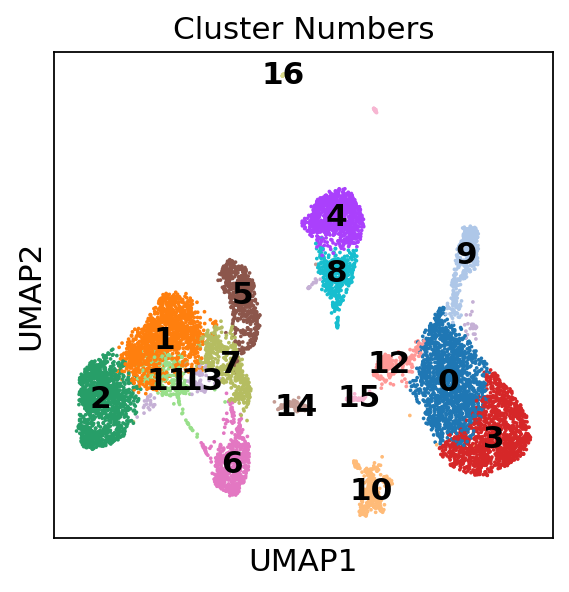

In [62]:
sc.pl.umap(
    adata,
    color=['leiden_scVI'],
    legend_loc='on data',  # This ensures the legend is on the plot
    title='Cluster Numbers'
)

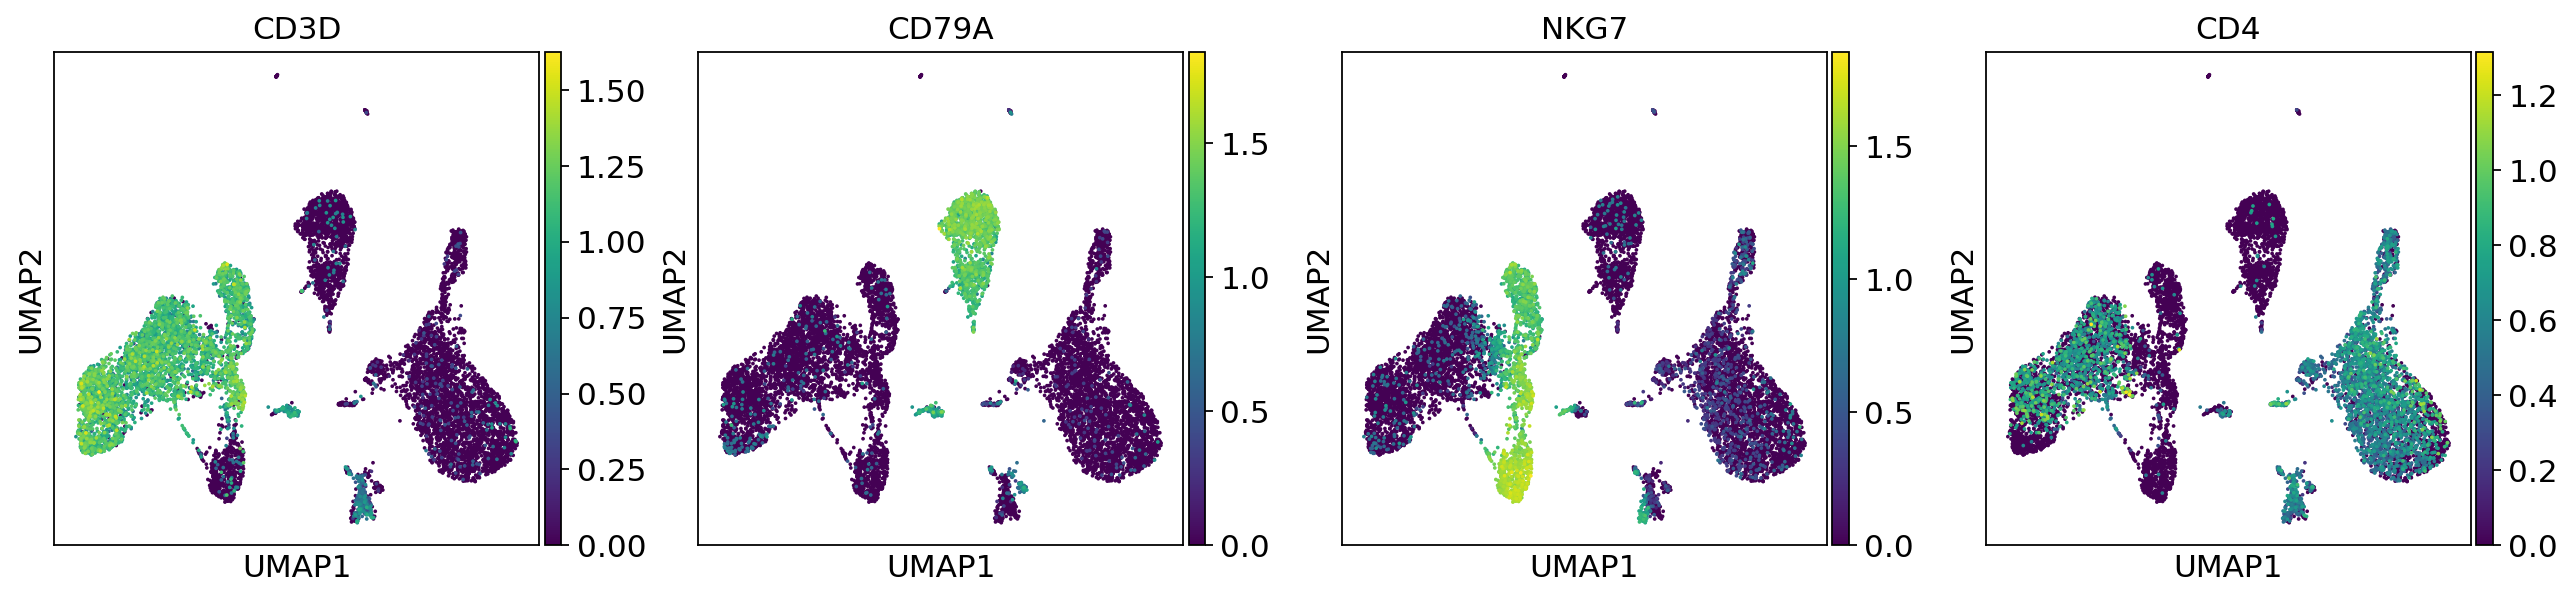

In [65]:
sc.pl.umap(adata, color=["CD3D", "CD79A", "NKG7","CD4"])